#PhonePe-Pulse Data Analysis

## Primary Knowledge About Data

**The Indian digital payments story has truly captured the world’s imagination. From the largest towns to the remotest villages, there is a payments revolution being driven by the penetration of mobile phones, mobile internet and state-of-art payments infrastructure built as Public Goods championed by the central bank and the government. PhonePe started in 2016 and has been a strong beneficiary of the API driven digitisation of payments in India. When we started , we were constantly looking for definitive data sources on digital payments in India without much success. As a way of giving back to the data and developer community, we decided to open the anonymised aggregate data sets that demystify the what, why and how of digital payments in India. Licensed under the CDLA-Permissive-2.0 open data license, the PhonePe Pulse Dataset API is a first of its kind open data initiative in the payments space.**

This data has been structured to provide details of following two sections with data cuts on Transactions and Users of PhonePe Pulse - Explore tab.

* Aggregated - Aggregated values of various payment categories as shown under Categories section
* Map - Total values at the State and District levels.
* Top - Totals of top States / Districts /Pin Codes

All the data provided in these folders is of JSON format.

**Understanding JSON format data and converting to CSV**

**Structure**

Head to the data folder to the find below shown structure. Overall, above mentioned sections data can be found at top level folder structure.
Under each of these sections there are folders for Transactions and Users respectively.

Data for Transactions and Users is grouped under country level within India folder which further grouped the data into each year(for country level data) and there is one folder with name state which groups data for all the available states of India respectively.

Similar to country level data, state level data too grouped into each year. All of these year folders(both at country and state level) have a maximum of four files with names starting from 1 to 4. These numbers represent each quarter in the selected year.

Example:

data
|___ aggregated
    |___ transactions
        |___ country
            |___ india
                |___ 2018
                |    1.json
                |    2.json
                |    3.json
                |    4.json
                
                |___ 2019
                |    ...
                |___ 2019
                |___ state
                    |___ andaman-&-nicobar-islands
                        |___2018
                        |   1.json
                        |   2.json
                        |   3.json
                        |   4.json

                    |___ andhra-pradesh
                    |    ...
                    |    ...

JSON Structure / Syntax for Aggregated Transactions
1. Aggregated
1.1 data/aggregated/transaction/country/india/2018/1.json
Transaction data broken down by type of payment at country level.

For complete details on syntax find the comments in below code

NOTE: Similar syntax is followed for state level too. Ex: data/aggregated/transaction/country/india/state/delhi/2018/1.json

{
    "success": true, //Ignore. For internal use only
    "code": "SUCCESS", //Ignore. For internal use only
    "data": {
        "from": 1514745000000, //Data duration
        "to": 1522175400000,
        "transactionData": [
            {
                "name": "Recharge & bill payments", //Type of payment category
                "paymentInstruments": [
                    {
                        "type": "TOTAL",
                        "count": 72550406, //Total number of transactions for the above payment category
                        "amount": 1.4472713558652578E10 //Total value
                    }
                ]
            },
            
            ...,

            ...,
                        
            {
                "name": "Others",
                "paymentInstruments": [
                    {
                        "type": "TOTAL",
                        "count": 5761576,
                        "amount": 4.643217301269438E9
                    }
                ]
            }
        ]
    },
    "responseTimestamp": 1630346628866 //Ignore. For internal use only.
}

Frequency of data update- 3 months

## Analysis using Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt                                                         #for plotting
import seaborn as sns
import pandas as pd

**Converting the Json File data to CSV format and importing as DataFrames**

In [3]:
import gdown                                                                                                         #importing from drive

gdown.download('https://drive.google.com/uc?id=1Cnhd_mkFlI38pJe0ZOywis3u3Ynpe3SU', 'aggregated_transactions.csv')    #naming and storing as CSV
gdown.download('https://drive.google.com/uc?id=1DBWpTuCU2AqAaRoPD8MXNMd0xtAlT8ko', 'aggregated_users.csv')
gdown.download('https://drive.google.com/uc?id=1DAJuJGKOmE70D8xQLPYaf82hU-X46nXG', 'map_transactions.csv')
gdown.download('https://drive.google.com/uc?id=1DIRNODNc0z9yyjsPHwM_82Oay_6cOnDC', 'map_users.csv')
gdown.download('https://drive.google.com/uc?id=1DDzVx4AzUxs-c1PFJeTtlYmzyAGUXE2k', 'top_transactions.csv')
gdown.download('https://drive.google.com/uc?id=1DJrXX0dUs4-jWwMYKraU6Lks204_-Wa1', 'top_users.csv')

Downloading...
From: https://drive.google.com/uc?id=1Cnhd_mkFlI38pJe0ZOywis3u3Ynpe3SU
To: /content/aggregated_transactions.csv
100%|██████████| 526k/526k [00:00<00:00, 81.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DBWpTuCU2AqAaRoPD8MXNMd0xtAlT8ko
To: /content/aggregated_users.csv
100%|██████████| 657k/657k [00:00<00:00, 68.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DAJuJGKOmE70D8xQLPYaf82hU-X46nXG
To: /content/map_transactions.csv
100%|██████████| 1.71M/1.71M [00:00<00:00, 53.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DIRNODNc0z9yyjsPHwM_82Oay_6cOnDC
To: /content/map_users.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 84.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DDzVx4AzUxs-c1PFJeTtlYmzyAGUXE2k
To: /content/top_transactions.csv
100%|██████████| 1.47M/1.47M [00:00<00:00, 77.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DJrXX0dUs4-jWwMYKraU6Lks204_-Wa1
To: /content/top_users.csv
100%|██████████| 1.08M/1.0

'top_users.csv'

### Data Observation

**There are 6 datasets that gives data for Aggregated Transactions/users,region wise app usage and Top usage state/regionwise.**

In [4]:
aggregated_transactions = pd.read_csv('aggregated_transactions.csv')
aggregated_users = pd.read_csv('aggregated_users.csv')
map_transactions = pd.read_csv('map_transactions.csv')
map_users = pd.read_csv('map_users.csv')
top_transactions = pd.read_csv('top_transactions.csv')
top_users = pd.read_csv('top_users.csv')

In [5]:
aggregated_transactions.head()

,Unnamed: 0,country,state,year,quarter,response_timestamp,from,to,transaction_index,entity_name,payment_instrument_index,payment_instrument_type,payment_instrument_count,payment_instrument_amount
0,0,india,NaN,2022,1,1651127570915,1640975400000,1648405800000,0,Merchant payments,0,TOTAL,3748851071,2.272818e+12
1,1,india,NaN,2022,1,1651127570915,1640975400000,1648405800000,1,Peer-to-peer payments,0,TOTAL,3074250150,1.050594e+13
2,2,india,NaN,2022,1,1651127570915,1640975400000,1648405800000,2,Recharge & bill payments,0,TOTAL,749674246,4.475998e+11
3,3,india,NaN,2022,1,1651127570915,1640975400000,1648405800000,3,Financial Services,0,TOTAL,4035100,4.921212e+09
4,4,india,NaN,2022,1,1651127570915,1640975400000,1648405800000,4,Others,0,TOTAL,16393502,8.422766e+09


In [6]:
aggregated_users.head()

,Unnamed: 0,country,state,year,quarter,response_timestamp,aggregated_registered_users,aggregated_app_opens,brand,count,percentage
0,0,india,NaN,2022,1,1651127632781,372951831,15724195113,Xiaomi,88426997.0,0.237100
1,1,india,NaN,2022,1,1651127632781,372951831,15724195113,Vivo,77224616.0,0.207063
2,2,india,NaN,2022,1,1651127632781,372951831,15724195113,Samsung,65886728.0,0.176663
3,3,india,NaN,2022,1,1651127632781,372951831,15724195113,Oppo,49093857.0,0.131636
4,4,india,NaN,2022,1,1651127632781,372951831,15724195113,Realme,32685615.0,0.087640


In [7]:
map_transactions.head()

,Unnamed: 0,country,state,year,quarter,response_timestamp,hoverdatalist_index,name,metric_index,metric_type,metric_count,metric_amount
0,0,india,NaN,2022,1,1651127571275,0,puducherry,0,TOTAL,7359176,1.208347e+10
1,1,india,NaN,2022,1,1651127571275,1,tamil nadu,0,TOTAL,294573150,5.127892e+11
2,2,india,NaN,2022,1,1651127571275,2,uttar pradesh,0,TOTAL,473953246,8.831232e+11
3,3,india,NaN,2022,1,1651127571275,3,madhya pradesh,0,TOTAL,472703058,7.476651e+11
4,4,india,NaN,2022,1,1651127571275,4,andhra pradesh,0,TOTAL,582603911,1.294321e+12


In [8]:
map_users.head()

,Unnamed: 0,country,state,year,quarter,response_timestamp,hoverdata_key,registered_users,app_opens
0,0,india,NaN,2022,1,1651127633214,puducherry,448051,3938657
1,1,india,NaN,2022,1,1651127633214,tamil nadu,21667020,638490275
2,2,india,NaN,2022,1,1651127633214,uttar pradesh,38999692,836926025
3,3,india,NaN,2022,1,1651127633214,madhya pradesh,19656147,1678266475
4,4,india,NaN,2022,1,1651127633214,andhra pradesh,23857951,1254785973


In [9]:
top_transactions.head()

,Unnamed: 0,country,state,year,quarter,response_timestamp,entity_type,entity_index,entity_name,metric_type,metric_count,metric_amount
0,0,india,NaN,2022,1,1651127572274,states,0,maharashtra,TOTAL,1169506438,1.681399e+12
1,1,india,NaN,2022,1,1651127572274,states,1,karnataka,TOTAL,1057855407,1.566649e+12
2,2,india,NaN,2022,1,1651127572274,states,2,telangana,TOTAL,886453385,1.670638e+12
3,3,india,NaN,2022,1,1651127572274,states,3,andhra pradesh,TOTAL,582603911,1.294321e+12
4,4,india,NaN,2022,1,1651127572274,states,4,rajasthan,TOTAL,564962220,1.022050e+12


In [10]:
top_transactions.shape

(15708, 12)

In [11]:
top_users.head()

,Unnamed: 0,country,state,year,quarter,response_timestamp,entity_type,state_index,name,registeredUsers
0,0,india,NaN,2022,1,1651127634141,states,0,maharashtra,48227630
1,1,india,NaN,2022,1,1651127634141,states,1,uttar pradesh,38999692
2,2,india,NaN,2022,1,1651127634141,states,2,karnataka,31200349
3,3,india,NaN,2022,1,1651127634141,states,3,andhra pradesh,23857951
4,4,india,NaN,2022,1,1651127634141,states,4,rajasthan,23398857


In [12]:
# df1=aggregated_transactions.copy()
df2=aggregated_users.copy()                                                                 #creating copies to work on
df3=map_transactions.copy()
df4=map_users.copy()
df5=top_transactions.copy()
df6=top_users.copy()


### Data Preprocessing

#### Null value processing

In [13]:
df1=aggregated_transactions.copy()

In [14]:
df1.isna().sum()                # for first dataset

Unnamed: 0                     0
country                        0
state                        115
year                           0
quarter                        0
response_timestamp             0
from                           0
to                             0
transaction_index              0
entity_name                    0
payment_instrument_index       0
payment_instrument_type        0
payment_instrument_count       0
payment_instrument_amount      0
dtype: int64

* state column has 115 null values

In [16]:
df2.isna().sum()         #for second dataset

Unnamed: 0                       0
country                          0
state                          193
year                             0
quarter                          0
response_timestamp               0
aggregated_registered_users      0
aggregated_app_opens             0
brand                          222
count                          222
percentage                     222
dtype: int64

null  values- state: 193
              brand: 222
              count: 222
              percentage: 222

In [17]:
df3.isna().sum()        #for third Dataset

Unnamed: 0               0
country                  0
state                  828
year                     0
quarter                  0
response_timestamp       0
hoverdatalist_index      0
name                     0
metric_index             0
metric_type              0
metric_count             0
metric_amount            0
dtype: int64

* 828 null values in "state" column for both Map datasets

In [ ]:
df4.isna().sum()          # for fourth dataset

In [19]:
df5.isna().sum()         # for fifth dataset

Unnamed: 0              0
country                 0
state                 690
year                    0
quarter                 0
response_timestamp      0
entity_type             0
entity_index            0
entity_name             2
metric_type             0
metric_count            0
metric_amount           0
dtype: int64

* 690 null values in "state" and 2 in "entity_name" columns

In [20]:
df5[df5['entity_name'].isna()]

,Unnamed: 0,country,state,year,quarter,response_timestamp,entity_type,entity_index,entity_name,metric_type,metric_count,metric_amount
11998,11998,india,ladakh,2019,4,1630501491310,pincodes,6,NaN,TOTAL,2014,1.009866e+07
12096,12096,india,ladakh,2020,4,1630501493439,pincodes,8,NaN,TOTAL,13717,3.671160e+07


In [21]:
df5.drop(df5[df5['entity_name'].isna()].index,inplace=True)

Dropping 2 null entries from "entity_name" column

In [22]:
df6.isna().sum()        #for sixth dataset

Unnamed: 0              0
country                 0
state                 690
year                    0
quarter                 0
response_timestamp      0
entity_type             0
state_index             0
name                    0
registeredUsers         0
dtype: int64

 From null value analysis we find,
 * There are null value for state values in all the datasets as they contain the aggregate countrywise data.
 * There are no other significant null values as such that would effect the validity of data if dropped

**As null values are large due to aggregated countrywise data, it is wise to analyse the state data and the aggregate data separately for uniformity in analysis**


In [25]:
df2_country=df2[df2['state'].isna()]


In [26]:
df3_country=df3[df3['state'].isna()]


In [27]:
df4_country=df4[df4['state'].isna()]

In [28]:
df5_country=df5[df5['state'].isna()]

df6_country=df6[df6['state'].isna()]


###Creating Non redundant Databases

Designing a database in at least 2nd normal form involves organizing data to reduce redundancy and avoid issues such as partial dependencies.

* For normalizing to 1st Normal Form (1NF), we ensure that each attribute contains atomic values (no sets or lists).
* For normalizing to 2nd Normal Form (2NF), we ensure that there are no partial dependencies. In 2nd normal form, all non-prime attributes (attributes not part of the primary key) must be fully functionally dependent on the entire primary key

In [29]:
tb_df1=df1[~df1['state'].isna()]     #using the state data excluding aggregated data for creating database


In [30]:
tb_df1=tb_df1[['state','year','quarter','entity_name','payment_instrument_count','payment_instrument_amount']]


**SQLite3** is a C library that provides a lightweight, disk-based database. It doesn't require a separate server process and allows access to the database using a nonstandard variant of the SQL query language. It is a self-contained, serverless, and zero-configuration database engine.

Choosing columns that are not redundant and atomic such that columns like 'state','year','quarter','entity_name','payment_instrument_count','payment_instrument_amount' and dropping columns such as 'response_timestamp','transaction_index','payment_instrument_index' as they either have irrelevant values for analysis or they are non atomic in nature.

In [31]:
import sqlite3

In [32]:
conn=sqlite3.connect('Phonepe-Pulse.db')                  #creating connection
cursor=conn.cursor()

In [33]:
tb_df1.to_sql('Agg_trans_state',conn,if_exists='replace',index=False)           #transfering dataset to database
pd.read_sql('select year,payment_instrument_count from agg_trans_state group by year',conn)    # reading query

,year,payment_instrument_count
0,2018,4200
1,2019,15263
2,2020,18324
3,2021,105458
4,2022,342649
5,2023,1122063


In [34]:
tb_df2=df2[~df2['state'].isna()].dropna()
tb_df2=tb_df2[['state','year','quarter','aggregated_registered_users','aggregated_app_opens','brand','count','percentage']]


In [35]:
tb_df2.to_sql('Agg_user_state',conn,if_exists='replace',index=False)
pd.read_sql('select year,count from agg_user_state group by year',conn)

,year,count
0,2018,1665.0
1,2019,4576.0
2,2020,6803.0
3,2021,13812.0
4,2022,18688.0


In [36]:
tb_df3=df3[~df3['state'].isna()].dropna()
tb_df3=tb_df3[['state','year','quarter','name','metric_count','metric_amount']]


In [37]:
tb_df3.to_sql('Map_trans_state',conn,if_exists='replace',index=False)
pd.read_sql('select name,metric_count from map_trans_state group by name order by metric_count desc',conn)

,name,metric_count
0,bengaluru urban district,648380838
1,pune district,424149132
2,hyderabad district,372711414
3,jaipur district,262950613
4,bhopal district,159892411
...,...,...
718,pakke kessang district,8817
719,muzaffarabad district,5151
720,pherzawl district,3014
721,dibang valley district,2927


In [38]:
tb_df4=df4[~df4['state'].isna()].dropna()
tb_df4=tb_df4[['state','year','quarter','registered_users','app_opens']]


In [ ]:
tb_df4.to_sql('Map_user_state',conn,if_exists='replace',index=False)
pd.read_sql('select state,registered_users from map_user_state group by state order by registered_users desc',conn)

In [40]:
tb_df5=df5[~df5['state'].isna()].dropna()
tb_df5=tb_df5[['state','year','quarter','entity_type','entity_name','metric_count','metric_amount']]


In [41]:
tb_df5.to_sql('Top_trans_state',conn,if_exists='replace',index=False)
pd.read_sql('select state,metric_amount from top_trans_state group by state order by metric_amount desc limit 10',conn)

,state,metric_amount
0,karnataka,8.379388e+11
1,telangana,6.615125e+11
2,maharashtra,5.084751e+11
3,rajasthan,4.345079e+11
4,madhya-pradesh,2.210968e+11
5,delhi,1.980726e+11
6,bihar,1.707390e+11
7,andhra-pradesh,1.701204e+11
8,west-bengal,1.554178e+11
9,odisha,1.527453e+11


In [42]:
tb_df6=df6[~df6['state'].isna()].dropna()
tb_df6=tb_df6[['state','year','quarter','entity_type','name','registeredUsers']]


In [43]:
tb_df6.to_sql('Top_user_state',conn,if_exists='replace',index=False)
pd.read_sql('select quarter,registeredUsers from top_user_state group by quarter order by registeredUsers desc limit 10',conn)

,quarter,registeredUsers
0,4,73692
1,3,70445
2,2,66959
3,1,63487


Six non redundant databases are formed by six datasets which can be for analysis via relational database methods, such as the query

*select year,count from agg_user_state group by year*

provides the yearwise count of app user statewise who have performed succesful transactions. From here, the analysis if maximum, minumum and other tendencies of data can easily be determined.

### Exploratory Data Analysis

* Analysis and visualisation of statewise data for aggregated and user datasets

In [44]:
tb_df1.info()                         #first dataset non-redundant

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4134 entries, 35 to 4168
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      4134 non-null   object 
 1   year                       4134 non-null   int64  
 2   quarter                    4134 non-null   int64  
 3   entity_name                4134 non-null   object 
 4   payment_instrument_count   4134 non-null   int64  
 5   payment_instrument_amount  4134 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 226.1+ KB


converting the datatypes in proper formats in order to analyse is necessary to reach appropriate conclusions.Also, observing the central tendencies and  other statistical properties of data shows a standard **gamma distribution** as expected from this type of data.

In [45]:
#converting numerical datatypes to object and vice versa
tb_df1=tb_df1.astype({'year':'object','quarter':'object'})

In [46]:
tb_df1.describe()                    # describes the basic statistical properties

,payment_instrument_count,payment_instrument_amount
count,4.134000e+03,4.134000e+03
mean,2.829355e+07,4.568227e+10
std,1.011291e+08,1.868535e+11
min,2.000000e+00,3.439721e+01
25%,4.688850e+04,3.125025e+07
50%,4.092310e+05,3.278236e+08
75%,8.409327e+06,7.491872e+09
max,1.502088e+09,2.393380e+12


In [51]:
tb_df1.corr()                              #correlation matrix

<ipython-input-51-2277d5a92332>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tb_df1.corr()                              #correlation matrix


,payment_instrument_count,payment_instrument_amount
payment_instrument_count,1.000000,0.695715
payment_instrument_amount,0.695715,1.000000


From the correlation matrix which gives the corelation coefficient between the numeric columns in the data,
* count of payment in aggregated transaction dataset is heavily correlated to amount of transaction indicating the count is proportional to the amount of transactions.

In [52]:
tb_df2=tb_df2.astype({'year':'object','quarter':'object','count':'int64'})       # changing year and quarter to categorical variable

##### Quarterwise Analysis

Upon analysis of various plots in the agrregate,map and top datasets by the 4 quarters of the year, the following observations are made.

<Axes: xlabel='quarter', ylabel='aggregated_app_opens'>

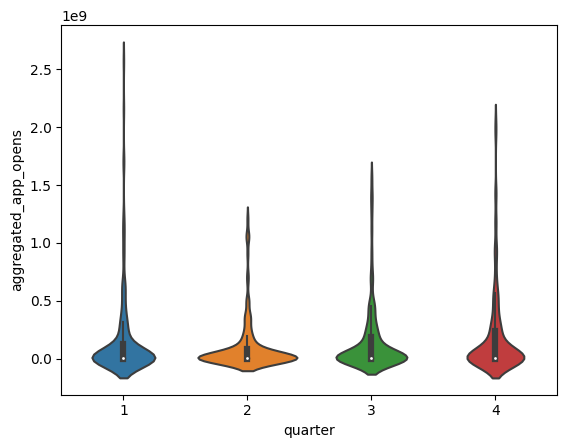

In [54]:
sns.violinplot(x='quarter',y='aggregated_app_opens',data=tb_df2)        #violin plot for quarter wise distribution of data

Link of news

* The spread/variance of the data in quarter 2 displays an unusually wider shape upon observation of aggregated user data. The wideninng in the distribution of data shown by violin plot can have multiple origins. Upon further probing, it is observed that the probable reason for this fluctuation can be **the 40% user growth of Phonepe in Q2 2021 due to Covid 19 alongwith an usual observed user base extension around this period of year**


<Axes: xlabel='quarter', ylabel='metric_count'>

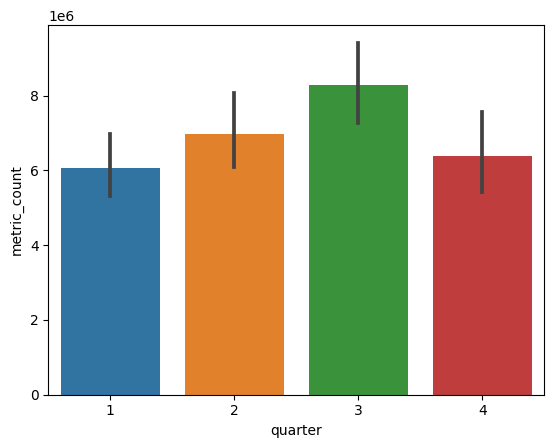

In [55]:
sns.barplot(x='quarter',y='metric_count',data=tb_df3)

Link of news


* From the barplot of data from Map aggregated data it is observed the overall statewise transaction id highest at Q3. It is further observed from investigation that during the same year 2021, **Phonepe hit its maximum transaction count and revenue.**

The key highlights of the quarter were:

* The Total Payments Value (TPV) of transactions processed grew 23.3% QoQ to INR 921,674 Cr while the number of transactions grew by 33.6% to 526.5 Cr transactions. The continued growth in both these metrics is a clear indication of increasing consumer trust in digital payments.
* For the first time ever, money transfers with UPI and merchant payments hit a new milestone of 200 Cr.+ transactions clocking 221 Cr. and 231 Cr. transactions respectively.
* Offline merchant payments grew faster than online merchant payments registering a QoQ growth rate of 65% which is an indicator of recovery post the second wave of the pandemic and stores rapidly opening up.
* Furthermore, the trend of digital payments becoming a Pan-India habit also continued, with 720 out of 726 districts in the country registering positive growth in digital transactions volume. This is also shown in the number of registered users which grew from 30.5 Cr. to 32.8 Cr.

##### Correlation Variable Analysis by Dataset

A heatmap is a graphical representation of data where the individual values in a matrix are represented as colors. It's an effective way to visualize data in a tabular format and is often used to explore relationships or patterns within the data

<ipython-input-57-42efbf9f7d01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tb_df2.corr())                                          #heatmap of correlation matrix


<Axes: >

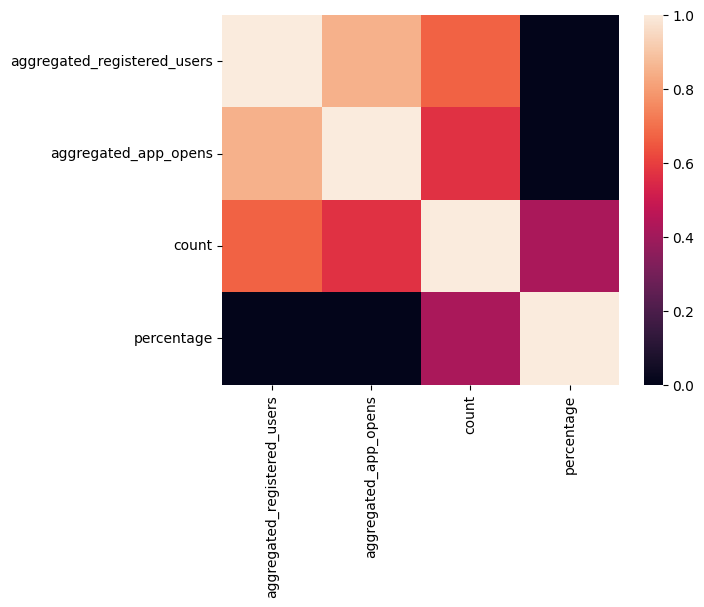

In [57]:
sns.heatmap(tb_df2.corr())                                          #heatmap of correlation matrix

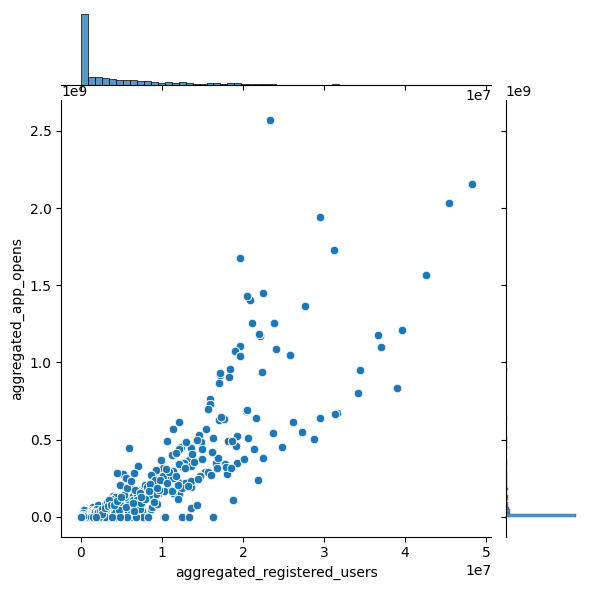

In [58]:
sns.jointplot(x='aggregated_registered_users',y='aggregated_app_opens',data=tb_df2)    #joint plot of user aggregated transactions

The analysis of the aggregated user transaction data further followed the trend of direct positive correlation between the aggregated registered users and aggregated app opens, which can be seen by the heatmap and scatterplot.
* It can be observed that upto a population of 2 million registered users there are close to 1 million app opens, which suggest the consistency in the market.
which can also be verified from the below excerpt from Phonepe press release.


National, January 7th, 2022: PhonePe, India’s leading fintech platform today announced that it has crossed 350 million lifetime registered users further cementing its leadership position. This essentially means that one in four Indians now use PhonePe. The registered user base has grown by 28% from 273 million in January to 350 million in December 2021. The company also reported 150 million monthly active users (MAU) and an annualized total payment value (TPV) of $651 billion in December.

PhonePe is leading the industry on all key metrics including value and volume of transactions, registered users as well as merchant coverage. The company has been the market leader in UPI with over 45% market share in terms of the volume of transactions processed in December. It also processed over 500 million transactions at physical stores (including kiranas) in December 2021. This was achieved due to the rapid expansion of PhonePe’s merchant coverage spanning 25 million stores spread across 15,700 towns and villages, constituting 99% of pin codes in India.

<ipython-input-59-c7bdb48d9e87>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tb_df2['aggregated_registered_users'],shade=True,label='aggregated_registered_users')


<Axes: xlabel='aggregated_registered_users', ylabel='Density'>

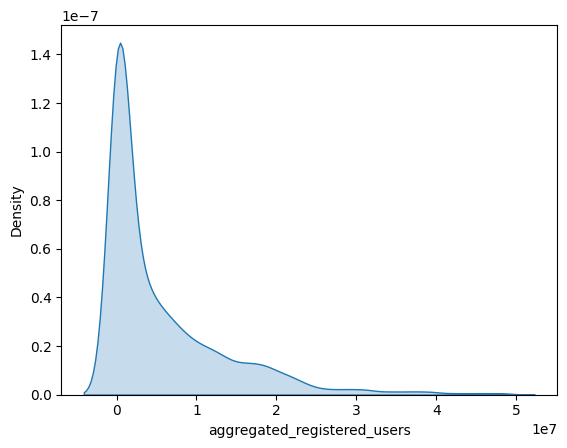

In [59]:
sns.kdeplot(tb_df2['aggregated_registered_users'],shade=True,label='aggregated_registered_users')


The above KDE plot of the aggregated registered user shows a right skewness and is leptokurtic suggest the distribution of the data shows a near gamma distribution.

The above plots and inferences brings to a conclusion that the app has reached a peak amount of registered users optimising its market presence.

In [60]:
tb_df3=tb_df3.astype({'year':'object','quarter': 'object'})      #converting to categorical variables

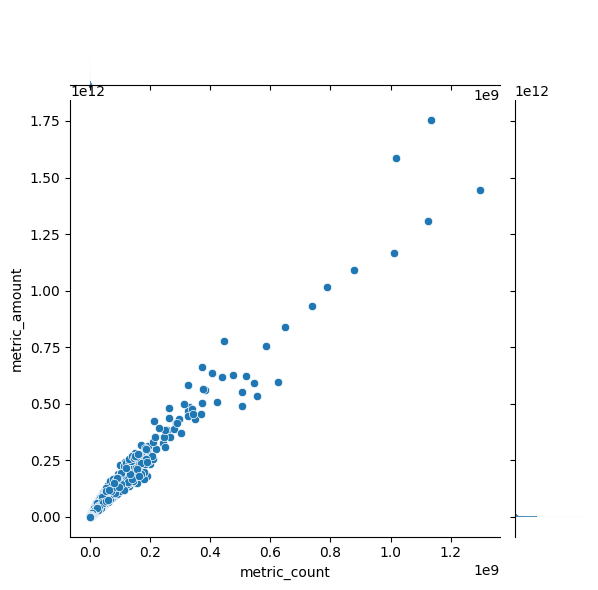

In [61]:
sns.jointplot(x='metric_count',y='metric_amount',data=tb_df3)     # joint plot

<Axes: xlabel='year', ylabel='metric_amount'>

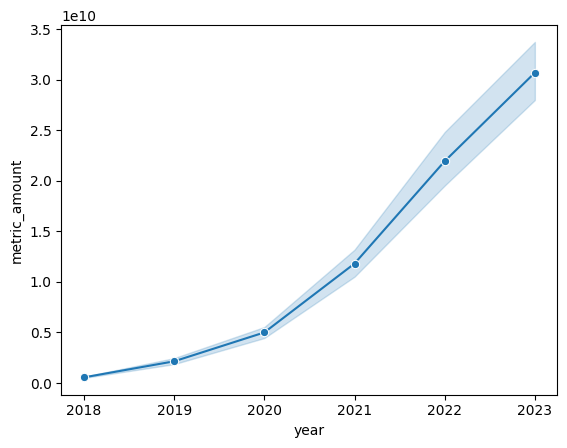

In [62]:
sns.lineplot(x='year',y='metric_amount',data=tb_df3,marker='o')


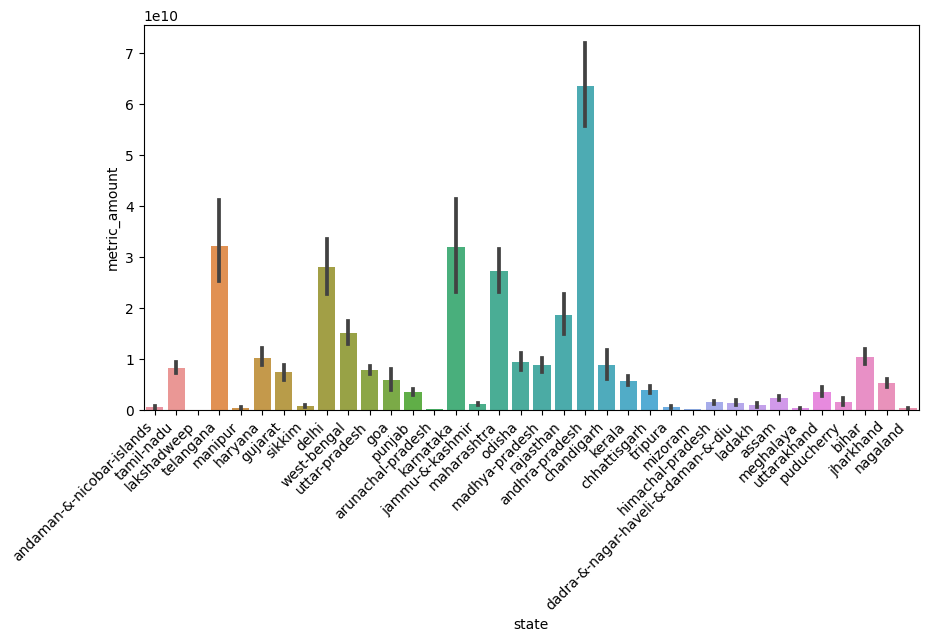

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='state',y='metric_amount',data=tb_df3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Similar correlation and tendency of data can be observed for Map transaction data where observations are

* A heavy correlation between the count of transactions and the transaction amount can be observed from the joint plot verifying the prevalence of app usage in across districts and pincodes.

* There has been a exponential increase in the rate of transaction through the app depicting a ever rising market.

* Andhara Pradesh, Telengana, Delhi, Karnataka among the states with maximum amount in Phonepe transactions.

In [64]:
tb_df4=tb_df4.astype({'year':'object','quarter': 'object'})        #converting to categorical variables

<Axes: xlabel='year', ylabel='app_opens'>

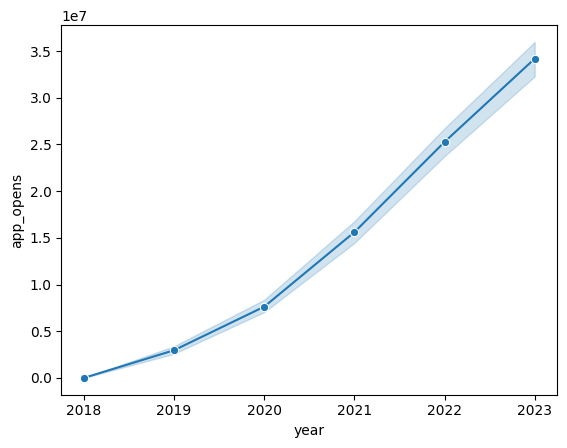

In [66]:
sns.lineplot(x='year',y='app_opens',data=tb_df4,marker='o')


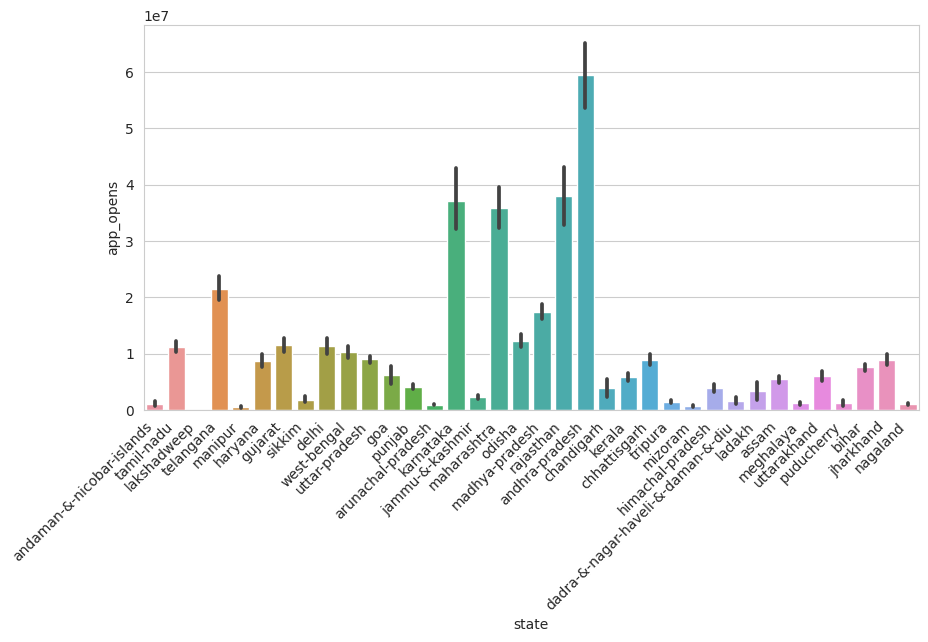

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='state',y='app_opens',data=tb_df4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

From Map user data we can observe that
* The amount of app opens have exponentially increased over the year directly indicating an increase in market acquisition.
* In some states the aggregated amount of transactions is inconsistent with number of app opens such as west bengal where app open is on par with Delhi but less transaction amount.

In [68]:
tb_df5=tb_df5.astype({'year':'object','quarter': 'object'})      #converting to categorical variable

<Axes: xlabel='metric_amount', ylabel='metric_count'>

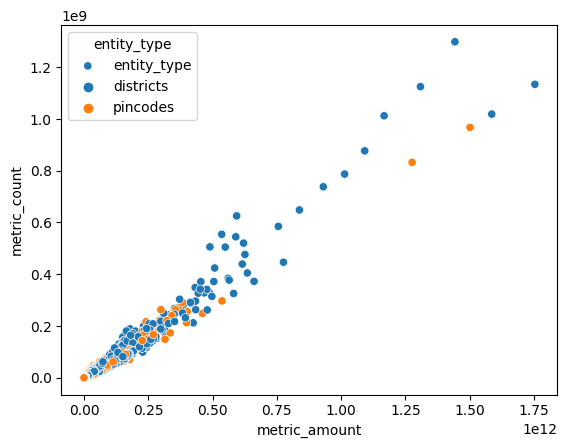

In [69]:
sns.scatterplot(x='metric_amount',y='metric_count',data=tb_df5,hue='entity_type',label='entity_type')

<Axes: xlabel='entity_type', ylabel='registeredUsers'>

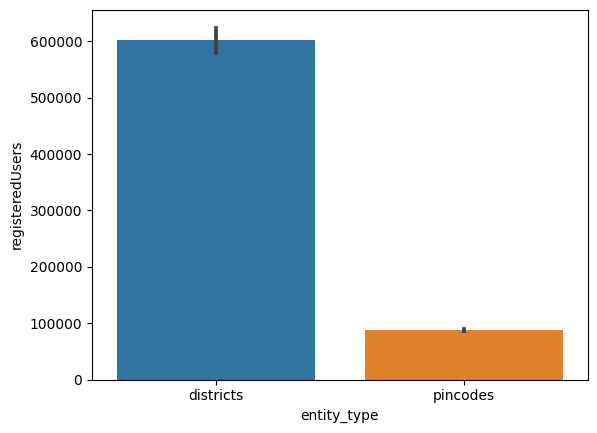

In [70]:
sns.barplot(x='entity_type',y='registeredUsers',data=tb_df6)

<Axes: xlabel='entity_type', ylabel='registeredUsers'>

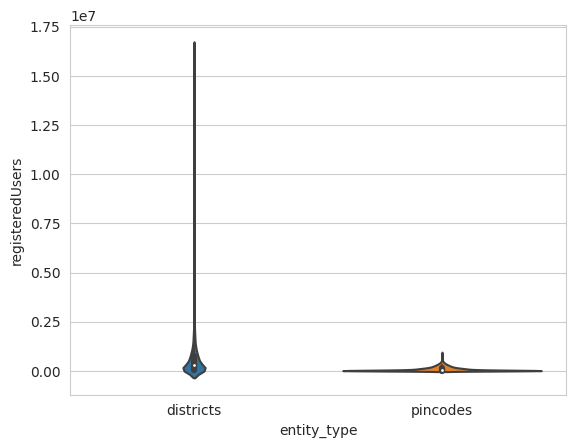

In [86]:
sns.violinplot(x='entity_type',y='registeredUsers',data=tb_df6)

* The Top Users data predominantly consists of districts as entity type or data point.
* The pincodes show very high variance in terms of registered user whichvaries greatly across regions where phonepe hasnt reached yet. District data is more uniform indicating the successful district wise penetration of Phonepe.


In [89]:
#separate the aggregate country data where state is not present
df1_country=df1[df1['state'].isna()]


<Figure size 800x600 with 0 Axes>

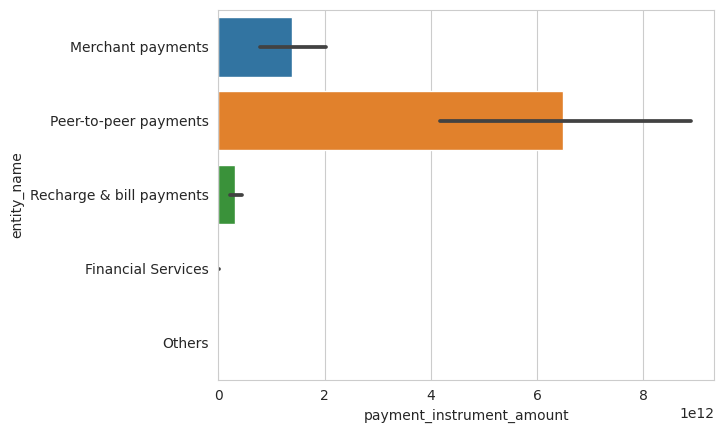

<Figure size 800x600 with 0 Axes>

In [90]:
sns.barplot(y='entity_name',x='payment_instrument_amount',data=df1_country)
plt.figure(figsize=(8,6))


In the aggregated countrywise Transaction dataset,

* Peer to peer payment type has the highest amount of transactions followed by merchant payment. It is suspected that this change has occurred solely due to COVID 19.

###Implementing Kmeans on Aggregated user Data

**Question-Can the amount of registered users and app opens be clustered into groups??**

In [71]:
from sklearn.cluster import KMeans                                 #importing Kmeans
import matplotlib.cm as cm                                         #importing matplotlib.cm

K-means is a popular unsupervised machine learning algorithm used for clustering data into groups or clusters based on similarity. It aims to partition a dataset into K distinct, non-overlapping clusters, where each data point belongs to only one cluster.

<Axes: xlabel='count', ylabel='aggregated_app_opens'>

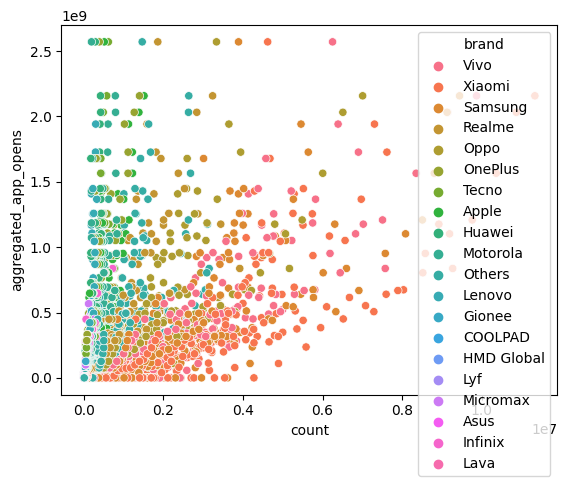

In [73]:
sns.scatterplot(x='count',y='aggregated_app_opens',data=tb_df2,hue='brand')

In [74]:
cluster_data=tb_df2[['aggregated_registered_users','aggregated_app_opens','count']]

In [75]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,8):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(cluster_data)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of Clusters (K):

Selecting an appropriate value for K is crucial. Domain knowledge or techniques like the elbow method or silhouette score can help determine the optimal number of clusters.
Sensitive to Initial Centroids:

K-means' performance can be sensitive to the initial placement of centroids, as different initializations can lead to different results.
Techniques like K-means++ initialization aim to address this issue by selecting initial centroids that are well-separated.

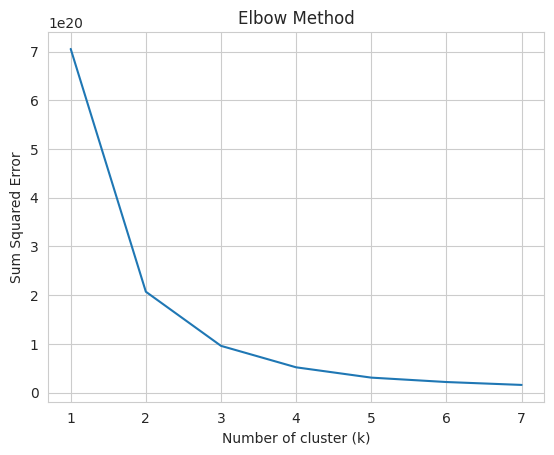

In [76]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,8), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

The **elbow method** is a technique used to determine the optimal number of clusters (K) in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" or bend in the plot. The point where the plot starts to level off or form an elbow-like shape indicates an optimal number of clusters.

Sharp curve at 2 and 3 observed by Elbow Method.

* Choosing to cluster  the data into 3 initial clusters

In [77]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [78]:
kmeans.cluster_centers_

array([[2.45595303e+06, 2.65946648e+07, 2.23268457e+05],
       [2.59803815e+07, 1.30527459e+09, 2.36185287e+06],
       [1.55200451e+07, 4.14905219e+08, 1.41091319e+06]])

In [79]:
pred = kmeans.fit_predict(cluster_data)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0, 0.5, 'aggregated_app_opens')

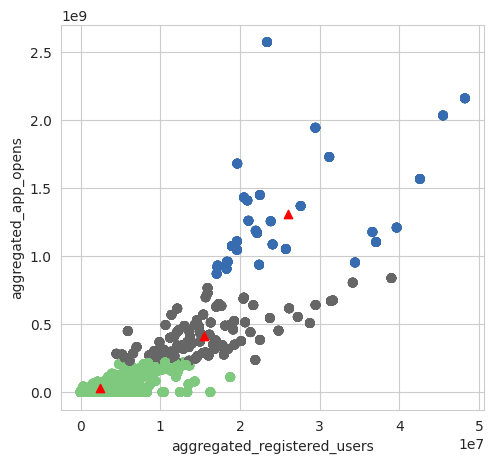

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(cluster_data['aggregated_registered_users'],cluster_data['aggregated_app_opens'],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("aggregated_registered_users")
plt.ylabel("aggregated_app_opens")

As the distribution of the registered user and the app opens are linearly connected with less randomness, thus kmeans or collections are not easily feasible.

Not efficient Kmeans clusters are formed.